In [109]:
#pip install spacy
#!python -m spacy download pl_core_news_sm

In [110]:
from datasets import load_dataset
import pandas as pd
import spacy
import numpy as np
from spacy.tokenizer import Tokenizer
from spacy.lang.pl import Polish
import re
import time

## Use the corpus from exercise no. 1.

In [111]:
dataset = load_dataset("clarin-knext/fiqa-pl", 'corpus')
dataset

Found cached dataset fiqa-pl (C:/Users/Macie/.cache/huggingface/datasets/clarin-knext___fiqa-pl/corpus/0.0.0/bada00640881ee3fd04c3b88df9edd435616d17e0a46faf05e63063858742140)


  0%|          | 0/1 [00:00<?, ?it/s]

DatasetDict({
    corpus: Dataset({
        features: ['_id', 'title', 'text'],
        num_rows: 57638
    })
})

In [112]:
df=pd.DataFrame(dataset['corpus'])
df

,_id,title,text
0,3,,"Nie mówię, że nie podoba mi się też pomysł szk..."
1,31,,Tak więc nic nie zapobiega fałszywym ocenom po...
2,56,,Nigdy nie możesz korzystać z FSA dla indywidua...
3,59,,Samsung stworzył LCD i inne technologie płaski...
4,63,,Oto wymagania SEC: Federalne przepisy dotycząc...
...,...,...,...
57633,599946,,">Cóż, po pierwsze, drogi to coś więcej niż hob..."
57634,599953,,"Tak, robią. Na dotacje dla firm farmaceutyczny..."
57635,599966,,">To bardzo smutne, że nie rozumiesz ludzkiej n..."
57636,599975,,„Czy Twój CTO pozwolił dużej grupie użyć „„adm...


In [113]:
#Cleaning special characters
df['text'] = df['text'].apply(lambda text: re.sub('\W+', ' ', text))

In [114]:
df['text']

0        Nie mówię że nie podoba mi się też pomysł szko...
1        Tak więc nic nie zapobiega fałszywym ocenom po...
2        Nigdy nie możesz korzystać z FSA dla indywidua...
3        Samsung stworzył LCD i inne technologie płaski...
4        Oto wymagania SEC Federalne przepisy dotyczące...
                               ...                        
57633     Cóż po pierwsze drogi to coś więcej niż hobby...
57634    Tak robią Na dotacje dla firm farmaceutycznych...
57635     To bardzo smutne że nie rozumiesz ludzkiej na...
57636     Czy Twój CTO pozwolił dużej grupie użyć admin...
57637    Zapewnienie rządowi większej kontroli nad dyst...
Name: text, Length: 57638, dtype: object

## Use SpaCy tokenizer API to tokenize the text in the documents.

In [115]:
nlp = spacy.load("pl_core_news_sm")

In [116]:
tokenizer = Tokenizer(nlp.vocab)

In [117]:
df['tokens']=df['text'].apply(lambda x: tokenizer(x.lower()))

In [118]:
df

,_id,title,text,tokens
0,3,,Nie mówię że nie podoba mi się też pomysł szko...,"(nie, mówię, że, nie, podoba, mi, się, też, po..."
1,31,,Tak więc nic nie zapobiega fałszywym ocenom po...,"(tak, więc, nic, nie, zapobiega, fałszywym, oc..."
2,56,,Nigdy nie możesz korzystać z FSA dla indywidua...,"(nigdy, nie, możesz, korzystać, z, fsa, dla, i..."
3,59,,Samsung stworzył LCD i inne technologie płaski...,"(samsung, stworzył, lcd, i, inne, technologie,..."
4,63,,Oto wymagania SEC Federalne przepisy dotyczące...,"(oto, wymagania, sec, federalne, przepisy, dot..."
...,...,...,...,...
57633,599946,,Cóż po pierwsze drogi to coś więcej niż hobby...,"( , cóż, po, pierwsze, drogi, to, coś, więcej,..."
57634,599953,,Tak robią Na dotacje dla firm farmaceutycznych...,"(tak, robią, na, dotacje, dla, firm, farmaceut..."
57635,599966,,To bardzo smutne że nie rozumiesz ludzkiej na...,"( , to, bardzo, smutne, że, nie, rozumiesz, lu..."
57636,599975,,Czy Twój CTO pozwolił dużej grupie użyć admin...,"( , czy, twój, cto, pozwolił, dużej, grupie, u..."


## Compute frequency list for each of the processed files.

In [119]:
from collections import Counter
df['freq_list']=df['tokens'].apply(lambda word: Counter(word))

## Aggregate the result to obtain one global frequency list. This frequency list gives you unigram statistics of the words appearing in the corpus.

In [120]:
from collections import defaultdict

global_frequency_list = defaultdict(lambda: 0)

texts = df['text'].apply(lambda s: s.lower())

for doc in tokenizer.pipe(texts, batch_size=50):
    for token in doc:
        global_frequency_list[token.text] += 1


In [121]:
sorted_frequency_list = dict(sorted(global_frequency_list.items(), key=lambda item: item[1], reverse=True))

In [122]:
sorted_frequency_list

{'w': 175696,
 'nie': 132040,
 'i': 127191,
 'na': 119136,
 'to': 117734,
 'z': 97166,
 'jest': 93567,
 'że': 90027,
 'się': 85874,
 'do': 66678,
 'jeśli': 52287,
 'a': 42203,
 'ale': 41350,
 'o': 38284,
 'są': 35525,
 'jak': 33699,
 'lub': 33260,
 'za': 32380,
 'aby': 31077,
 'co': 29956,
 'od': 29890,
 'może': 26450,
 'po': 25750,
 'tak': 25696,
 'dla': 25514,
 'które': 23984,
 'możesz': 23427,
 'tego': 21958,
 'tym': 21611,
 'czy': 20335,
 'ma': 20310,
 'być': 19275,
 'ponieważ': 18969,
 'przez': 17869,
 'usd': 17626,
 'tylko': 17275,
 'więc': 17201,
 'niż': 16833,
 ' ': 16739,
 'ich': 14628,
 'pieniądze': 14021,
 'więcej': 13912,
 'gdy': 13556,
 'jako': 12995,
 'pieniędzy': 12289,
 'który': 12151,
 'masz': 11776,
 'będzie': 11728,
 'mogą': 11710,
 '1': 11096,
 'firmy': 10755,
 'również': 10560,
 'akcji': 10427,
 'bardzo': 10198,
 'ci': 10030,
 'prostu': 9782,
 'nawet': 9778,
 'lat': 9522,
 'mają': 9324,
 'wiele': 9240,
 'ten': 9028,
 'te': 8803,
 'com': 8683,
 'ze': 8620,
 'kiedy':

## Apply a distortion function to the queries part of the corpus. In each query draw randomly one word and change one letter in the word to some other letter.

In [123]:
from random import choice

In [124]:
#chatgpt used to generate function, tested it on example, it works
def distort_query(query):
    # Split the query into words
    words = query.split()

    # Choose a random word from the query
    if words:
        random_word_index = choice(range(len(words)))
        word_to_distort = words[random_word_index]

        # Choose a random letter in the word to change
        if word_to_distort:
            random_letter_index = choice(range(len(word_to_distort)))
            original_letter = word_to_distort[random_letter_index]

            # Choose a different letter
            polish_alphabet = "aąbcćdeęfghijklłmnńoópqrsśtuvwxyzźż"
            new_letter = choice([letter for letter in polish_alphabet if letter != original_letter])

            # Create the distorted word
            distorted_word = (
                word_to_distort[:random_letter_index] +
                new_letter +
                word_to_distort[random_letter_index + 1:]
            )

            # Replace the original word with the distorted word in the query
            words[random_word_index] = distorted_word

    # Join the words back into a distorted query
    distorted_query = ' '.join(words)
    return distorted_query



In [125]:
df['distorted_queries'] = df['text'].apply(distort_query)

In [126]:
df['distorted_queries']

0        Nie mówię że nie podoba mi się też pomysł szko...
1        Tak więc nic nie zapobiega fałszywym ocenom po...
2        Nigdy nie możesz korzystać z FSA dla indywidua...
3        Samsung stworzył LCD i inne technologie płaski...
4        Oto wymagania SEC Federalne przepisy dotyczące...
                               ...                        
57633    Cóż po pierwsze drogi to coś więcej niż hobby ...
57634    Tak robią Na dotacje dla firm farmaceutycznych...
57635    To bardzo smutne że nie rozumiesz ludzkiej nat...
57636    Czy Twój CTO pozwolił dużej grupie użyć admin ...
57637    Zapewnienie rządowi większej kontroli nad dyst...
Name: distorted_queries, Length: 57638, dtype: object

## Compute nDCG@10 for the distorted queris, using the same approach as in lab 2. This result will be the baseline for the other methods.

In [127]:
from tqdm.notebook import tqdm

In [128]:
dict_corpus = df.set_index('_id').to_dict(orient='index')

In [129]:
queries = load_dataset("clarin-knext/fiqa-pl", "queries")

dict_queries = {str(record["_id"]): record["text"] for record in queries["queries"]}
distorted_queries = {key: distort_query(query) for key, query in dict_queries.items()}

Found cached dataset fiqa-pl (C:/Users/Macie/.cache/huggingface/datasets/clarin-knext___fiqa-pl/queries/0.0.0/bada00640881ee3fd04c3b88df9edd435616d17e0a46faf05e63063858742140)


  0%|          | 0/1 [00:00<?, ?it/s]

In [130]:
distorted_queries['0']

'Cę jest uważane za wydatek służbowy w podróży służbowej?'

In [131]:
queries_test = load_dataset("clarin-knext/fiqa-pl-qrels", "test")

qrels_dataset = defaultdict(dict)

for row in queries_test['test']:
    query_id, corpus_id, score = str(row['query-id']), str(row['corpus-id']), int(row['score'])
    qrels_dataset[query_id][corpus_id] = score

qrels_dataset = dict(qrels_dataset)

print(qrels_dataset)

Found cached dataset csv (C:/Users/Macie/.cache/huggingface/datasets/clarin-knext___csv/clarin-knext--fiqa-pl-qrels-87c7ba66b4612e3c/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1)


  0%|          | 0/3 [00:00<?, ?it/s]

{'8': {'566392': 1, '65404': 1}, '15': {'325273': 1}, '18': {'88124': 1}, '26': {'285255': 1, '350819': 1}, '34': {'599545': 1}, '42': {'272709': 1, '327263': 1, '331981': 1}, '56': {'572690': 1}, '68': {'19183': 1}, '89': {'413229': 1, '590102': 1, '268026': 1, '248624': 1, '508754': 1, '64556': 1}, '90': {'31793': 1}, '94': {'245447': 1}, '98': {'575929': 1, '527522': 1}, '104': {'575869': 1, '523158': 1}, '106': {'76695': 1}, '109': {'73427': 1}, '475': {'366761': 1}, '503': {'367641': 1}, '504': {'500755': 1, '344203': 1, '498751': 1}, '515': {'372909': 1}, '529': {'510701': 1}, '547': {'6349': 1, '278629': 1}, '549': {'214024': 1}, '559': {'246459': 1}, '570': {'363591': 1}, '585': {'140226': 1, '552375': 1}, '588': {'570546': 1, '203710': 1}, '594': {'377322': 1, '534059': 1}, '603': {'456440': 1}, '604': {'451443': 1, '231947': 1, '261622': 1}, '620': {'331332': 1, '417301': 1, '189303': 1, '180673': 1, '487067': 1}, '622': {'179756': 1, '369239': 1}, '659': {'13139': 1, '230908

In [132]:
from elasticsearch import Elasticsearch
es = Elasticsearch(['http://localhost:9200/'])
INDEX_NAME = "analyzer_pl"

es.info().body

{'name': '65db7b99f9bf',
 'cluster_name': 'docker-cluster',
 'cluster_uuid': 'oMd2u2xuSBugp0oySEszgw',
 'version': {'number': '8.10.4',
  'build_flavor': 'default',
  'build_type': 'docker',
  'build_hash': 'b4a62ac808e886ff032700c391f45f1408b2538c',
  'build_date': '2023-10-11T22:04:35.506990650Z',
  'build_snapshot': False,
  'lucene_version': '9.7.0',
  'minimum_wire_compatibility_version': '7.17.0',
  'minimum_index_compatibility_version': '7.0.0'},
 'tagline': 'You Know, for Search'}

In [133]:
es.indices.delete(index=INDEX_NAME)

ObjectApiResponse({'acknowledged': True})

In [134]:
combined_settings = {
    "settings": {
        "analysis": {
            "analyzer": {
                "analyzer_with_synonym": {
                    "type": "custom",
                    "tokenizer": "standard",
                    "filter": [
                        "synonyms_filter",
                        "lowercase",
                        "morfologik_stem",
                        "lowercase"
                    ]
                },
                "analyzer_without_synonym": {
                    "type": "custom",
                    "tokenizer": "standard",
                    "filter": [
                        "lowercase",
                        "morfologik_stem",
                        "lowercase"
                    ]
                },
                "analyzer_without_lematization": {
                    "type": "custom",
                    "tokenizer": "standard",
                    "filter": [
                        "synonyms_filter",
                        "lowercase"
                    ]
                },
                "analyzer_without_synonym_and_lematization": {
                    "type": "custom",
                    "tokenizer": "standard",
                    "filter": [
                        "lowercase"
                    ]
                }
            },
            "filter": {
                "synonyms_filter": {
                    "type": "synonym",
                    "synonyms": [
                        "styczeń, sty, I",
                        "luty, lut, II",
                        "marzec, mar, III",
                        "kwiecień, kwi, IV",
                        "maj, V",
                        "czerwiec, cze, VI",
                        "lipiec, lip, VII",
                        "sierpień, sie, VIII",
                        "wrzesień, wrz, IX",
                        "październik, paź, X",
                        "listopad, lis, XI",
                        "grudzień, gru, XII"
                    ]
                }
            }
        }
    }
}



# Create the index with combined settings
es.indices.create(index=INDEX_NAME, body=combined_settings)  # Ignore 400 means to ignore "IndexAlreadyExistsException"

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'analyzer_pl'})

In [135]:
from math import log2
#Functions copied

def get_ids(resp):
    ids = []
    for hit in resp['hits']['hits']:
        ids.append(int(hit['_id']))
    return ids

def dcg(relevance, K):
    if len(relevance) >= K:
        dcg_value = 0
        for k in range(1, K + 1):
            rel_k = relevance[k-1]
            # calculate dcg
            dcg_value += rel_k / log2(1 + k)

        return dcg_value
    else:
        return 0

def idcg(relevance, K):
    if len(relevance) >= K:
        # sorting to make ideal scenario
        ideal_relevance = sorted(relevance, reverse=True)
        idcg_value = 0
        for k in range(1, K + 1):
            rel_k = ideal_relevance[k-1]
            #calculate dcg:
            idcg_value += rel_k / log2(1 + k)

        return idcg_value
    else:
        return 0

def ndcg(relevance, K):
    if len(relevance) >= K:
        dcg_value = dcg(relevance, K)
        idcg_value = idcg(relevance, K)

        if idcg_value > 0:
            ndcg_value = dcg_value / idcg_value
            return ndcg_value
        else:
            return 0
    else:
        return 0

def map_relevance(result_ids, true_ids):
    relevance = []
    for id in result_ids:
        if id in true_ids:
            relevance.append(1)
        else:
            relevance.append(0)

    return relevance

def get_answers():
    answers = dataset["corpus"]["text"]

    ids_answers = dataset["corpus"]["_id"]
    ids_answers = [int(x) for x in ids_answers]

    d = {"id":ids_answers, "answer":answers}
    df = pd.DataFrame(data=d)
    return df

def get_queries():
    queries1 = queries["queries"]["text"]

    ids_queries = queries["queries"]["_id"]
    ids_queries = [int(x) for x in ids_queries]

    d = {"id":ids_queries, "query":queries1}
    df = pd.DataFrame(data=d)
    return df

def get_q_and_a():
    dataset = queries_test["test"]

    query_ids = dataset["query-id"]
    query_ids = [int(x) for x in query_ids]

    answers_ids = dataset["corpus-id"]
    answers_ids = [int(x) for x in answers_ids]

    d = {"query_id":query_ids, "answer_id":answers_ids}
    df = pd.DataFrame(data=d)
    return df

In [136]:
q = get_queries()
a = get_answers()
q_and_a = get_q_and_a()

# this is dickt with query id and all answers ids
query_to_answer = {}

for index, row in q_and_a.iterrows():
    query_id = row['query_id']
    answer_id = row['answer_id']

    if query_id in query_to_answer:
        query_to_answer[query_id].append(answer_id)
    else:
        query_to_answer[query_id] = [answer_id]

In [137]:
from elasticsearch.helpers import bulk

# Prepare a list of actions (index requests) for the Bulk API
actions = [
    {
        "_op_type": "index",  # Specify the operation type (index)
        "_index": INDEX_NAME,
        "_id": row["id"],
        "_source": {"text": row["answer"]}
    }
    for _, row in tqdm(a.iterrows())
]

# Use the bulk helper function to perform the bulk indexing
success, failed = bulk(es, actions, index=INDEX_NAME, raise_on_error=False)

0it [00:00, ?it/s]

In [138]:
distorted_queries_dataframe = pd.DataFrame(list(distorted_queries.items()), columns=["id", "query"])
distorted_queries_dataframe["id"] = distorted_queries_dataframe["id"].astype(int)
distorted_queries_dataframe

,id,query
0,0,Cę jest uważane za wydatek służbowy w podróży ...
1,4,Wydatki służbowe - ćbezpieczenie samochodu pod...
2,5,Rozpoczęcie norego biznesu online
3,6,„Dzień roboczy” i „termjn płatności” rachunków
4,7,Nowy właściciel firmy – Jań działają podatki d...
...,...,...
6643,4102,"Jak mogę ustalić, czy moja stopa zwrotu jest „..."
6644,3566,"Gdzie mogę kupić akcje, aeśli chcę zainwestowa..."
6645,94,Wykorzystywanie punktów kart kredytowych do op...
6646,2551,Jak znaleźć tańszą alternatywę dla tradycyjnej...


In [139]:
ndcg_values2 = []

for key, value in tqdm(query_to_answer.items()):
    id = key
    query_text = distorted_queries_dataframe[distorted_queries_dataframe['id'] == id]['query'].values[0]
    
    true_ids = value

    resp = es.search(
        index=INDEX_NAME,
        body={
            "query": {
                "multi_match": {
                    "query": query_text,
                    "fields": ["text"],
                    "analyzer": "analyzer_with_synonym"
                }
            }
        }
    )

    result_ids = get_ids(resp)

    relevance = map_relevance(result_ids=result_ids, true_ids=true_ids)
    ndcg_value = ndcg(relevance=relevance, K=10)

    ndcg_values2.append(ndcg_value)

  0%|          | 0/648 [00:00<?, ?it/s]

In [140]:
mean_ndcg2 = np.mean(ndcg_values2)
print(f"Result: {mean_ndcg2}")

Result: 0.1358071971498667


## Install Morfeusz (Binding dla Pythona) and use it to find all words from the queries that do not appear in that dictionary. Only these words should be corected in the next step.

In [73]:
# pip install morfeusz2

In [74]:
from morfeusz2 import Morfeusz

In [75]:
morf = Morfeusz()

def find_incorrect_word(text):
    analysis = morf.analyse(text)
    
    invalid_words = []
    
    for result in analysis:
        if result[2][2] == 'ign':
            invalid_words.append(result[2][0])
    return invalid_words

In [76]:
def in_morfeusz(token):
    analysis = morf.analyse(token)
    if analysis and analysis[0]:
        return analysis[0][2][2] != 'ign'
    return False

In [77]:
distorted_queries_dataframe['tokens']=distorted_queries_dataframe['query'].apply(lambda x: tokenizer(x.lower()))

In [78]:
distorted_queries_dataframe['freq_list']=distorted_queries_dataframe['tokens'].apply(lambda word: Counter(word))

In [79]:
distorted_queries_dataframe

,id,query,tokens,freq_list
0,0,Cv jest uważane za wydatek służbowy w podróży ...,"(cv, jest, uważane, za, wydatek, służbowy, w, ...","{cv: 1, jest: 1, uważane: 1, za: 1, wydatek: 1..."
1,4,Wydatni służbowe - ubezpieczenie samochodu pod...,"(wydatni, służbowe, -, ubezpieczenie, samochod...","{wydatni: 1, służbowe: 1, -: 1, ubezpieczenie:..."
2,5,Rozpoczgcie nowego biznesu online,"(rozpoczgcie, nowego, biznesu, online)","{rozpoczgcie: 1, nowego: 1, biznesu: 1, online..."
3,6,uDzień roboczy” i „termin płatności” rachunków,"(udzień, roboczy”, i, „termin, płatności”, rac...","{udzień: 1, roboczy”: 1, i: 1, „termin: 1, pła..."
4,7,Nowy właściciel firmy – Jak działają podatki d...,"(nowy, właściciel, firmy, –, jak, działają, po...","{nowy: 1, właściciel: 1, firmy: 1, –: 1, jak: ..."
...,...,...,...,...
6643,4102,"Jaw mogę ustalić, czy moja stopa zwrotu jest „...","(jaw, mogę, ustalić,, czy, moja, stopa, zwrotu...","{jaw: 1, mogę: 1, ustalić,: 1, czy: 1, moja: 1..."
6644,3566,"Gdzie mogę kupić akcje, jeśli chcę zainwestowa...","(gdzie, mogę, kupić, akcje,, jeśli, chcę, zain...","{gdzie: 1, mogę: 1, kupić: 1, akcje,: 1, jeśli..."
6645,94,Wykorzystywanie punktów kart kredytowych do op...,"(wykorzystywanie, punktów, kart, kredytowych, ...","{wykorzystywanie: 1, punktów: 1, kart: 1, kred..."
6646,2551,Jak znaleźć tańszą alternatywę dla tradycycnej...,"(jak, znaleźć, tańszą, alternatywę, dla, trady...","{jak: 1, znaleźć: 1, tańszą: 1, alternatywę: 1..."


In [80]:
find_incorrect_word(distorted_queries_dataframe['query'].iloc[0])

[]

In [81]:
global_frequency_list_queries = defaultdict(lambda: 0)

texts = distorted_queries_dataframe['query'].apply(lambda s: s)

for doc in tokenizer.pipe(texts, batch_size=50):
    for token in doc:
        global_frequency_list_queries[token.text] += 1
sorted_frequency_list_queries = dict(sorted(global_frequency_list_queries.items(), key=lambda item: item[1], reverse=True))

In [82]:
df_sorted_frequency_list_queries = pd.DataFrame({
    'token': list(sorted_frequency_list_queries.keys()),
    'count': list(sorted_frequency_list_queries.values())
})
df_sorted_frequency_list_queries

,token,count
0,w,1522
1,Czy,1415
2,na,1292
3,z,1055
4,Jak,838
...,...,...
20500,tradycycnej,1
20501,domowej,1
20502,telefonicznej?,1
20503,Skąe,1


In [83]:
not_in_dict=df_sorted_frequency_list_queries[~df_sorted_frequency_list_queries['token'].apply(lambda token: in_morfeusz(token))]

In [84]:
not_in_dict.head(5)
#around 2 minutes

,token,count
78,ETF,73
167,LLC,33
270,Finance,24
275,LLC?,23
287,Yahoo,23


## Use Levenshtein distance and the frequency list, to determine the most probable correction of the words in the queries that were identified as invalid. (Note: You don't have to apply the distance directly. Any method that is more efficient than scanning the dictionary will be appreciated.)

In [56]:
#pip install Levenshtein

In [86]:
N = sum(sorted_frequency_list_queries.values())


def correct_word(word):
    
    def candidates(word):
        letters    = 'aąbcćdeęfghijklłmnńoópqrsśtuvwxyzźż'
        splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
        deletes    = [L + R[1:]               for L, R in splits if R]
        transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
        replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
        inserts    = [L + c + R               for L, R in splits for c in letters]
        return set(deletes + transposes + replaces + inserts)

    def prob(word):
        return sorted_frequency_list.get(word, 0) / N
    
    return max(candidates(word), key=prob)

def correct(sentence, word_corrector=correct_word):
    words = find_incorrect_word(sentence)
    for word in words:
        fixed_word = word_corrector(word)
        sentence = sentence.replace(word, fixed_word)
    return sentence

In [87]:
distorted_queries_dataframe['query'].iloc[0]

'Cv jest uważane za wydatek służbowy w podróży służbowej?'

In [88]:
correct(distorted_queries_dataframe['query'].iloc[0])

'Cv jest uważane za wydatek służbowy w podróży służbowej?'

In [89]:
not_in_dict['corrected_token'] = not_in_dict['token'].apply(lambda x: correct(x))
not_in_dict

C:\Users\Macie\AppData\Local\Temp\ipykernel_8084\2405519818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_in_dict['corrected_token'] = not_in_dict['token'].apply(lambda x: correct(x))


,token,count,corrected_token
78,ETF,73,hETF
167,LLC,33,LL
270,Finance,24,finance
275,LLC?,23,LL?
287,Yahoo,23,yahoo
...,...,...,...
20487,zaewestionować,1,zakwestionować
20496,hanźel?,1,handel?
20497,odlidzyć,1,odliczyć
20500,tradycycnej,1,tradycyjnej


In [61]:
df_all=pd.DataFrame(list(distorted_queries.items()), columns=["id", "query"])
df_all["id"] = df_all["id"].astype(int)
start = time.time()
df_all['corrected']=df_all['query'].apply(lambda x: correct(x))
print(time.time()-start)

3.2681798934936523


In [62]:
df_all

,id,query,corrected
0,0,Co jest uważane za wydaęek służbowy w podróży ...,Co jest uważane za wydatek służbowy w podróży ...
1,4,Wydatki służbowe - ubezpieczenie samochodu pod...,Wydatki służbowe - ubezpieczenie samochodu pod...
2,5,Rozpoczęcie nooego biznesu online,Rozpoczęcie nowego biznesu online
3,6,„Dzień roboczy” i „termin płarności” rachunków,„Dzień roboczy” i „termin płatności” rachunków
4,7,Nowy właściciel firmy – Jak działają podatki d...,Nowy właściciel firmy – Jak działają podatki d...
...,...,...,...
6643,4102,"Jak mogę ustalić, czy moja stnpa zwrotu jest „...","Jak mogę ustalić, czy moja stopa zwrotu jest „..."
6644,3566,"Gdzie mogę kupić akcje, jeśli chcę zainwestowa...","Gdzie mogę kupić akcje, jeśli chcę zainwestowa..."
6645,94,Wykorzystywanie punktów kart kredytowych do op...,Wykorzystywanie punktów kart kredytowych do op...
6646,2551,Jak znaleźć tańszą alternatywę dla tradycyjnej...,Jak znaleźć tańszą alternatywę dla tradycyjnej...


## Compute nDCG@10 for your implementation of the spelling correction method. 

In [63]:
ndcg_values3 = []

for key, value in tqdm(query_to_answer.items()):
    id = key
    query_text = df_all[df_all['id'] == id]['corrected'].values[0]
    
    true_ids = value

    resp = es.search(
        index=INDEX_NAME,
        body={
            "query": {
                "multi_match": {
                    "query": query_text,
                    "fields": ["text"],
                    "analyzer": "analyzer_with_synonym"
                }
            }
        }
    )

    result_ids = get_ids(resp)

    relevance = map_relevance(result_ids=result_ids, true_ids=true_ids)
    ndcg_value = ndcg(relevance=relevance, K=10)

    ndcg_values3.append(ndcg_value)

  0%|          | 0/648 [00:00<?, ?it/s]

In [64]:
mean_ndcg3 = np.mean(ndcg_values3)

## Use ElasticSearch's fuzzy match and compute nDCG@10 for this approach.

In [65]:
ndcg_values4 = []

for key, value in tqdm(query_to_answer.items()):
    id = key
    query_text = df_all[df_all['id'] == id]['query'].values[0]
    
    true_ids = value

    resp = es.search(
        index=INDEX_NAME,
        body={
            "query": {
                "multi_match": {
                    "query": query_text,
                    "fuzziness": "auto",
                    "fields": ["text"],
                    "analyzer": "analyzer_with_synonym"
                }
            }
        }
    )

    result_ids = get_ids(resp)

    relevance = map_relevance(result_ids=result_ids, true_ids=true_ids)
    ndcg_value = ndcg(relevance=relevance, K=10)

    ndcg_values4.append(ndcg_value)

  0%|          | 0/648 [00:00<?, ?it/s]

In [66]:
mean_ndcg4 = np.mean(ndcg_values4)

## Compare the results of baseline with the 2 implemented methods. Take into account the nDCG score and the performance of the methods.

In [67]:
print(f"results:\n - distorted: {mean_ndcg2}, performance: ~41s, \n - Levenshtein : {mean_ndcg3}, performance:~37s,\n - fuzzy match: {mean_ndcg4}, performance:~43s,")

results:
 - distorted: 0.13154985236141678, performance: ~41s, 
 - Levenshtein : 0.11095009595418735, performance:~37s,
 - fuzzy match: 0.18629994624160506, performance:~43s,


Draw conclusions regarding (2 points):

- the distribution of words in the corpus,
- the performance of your method compared to ElasticSearch,
- the results provided by your method compared to ElasticSearch,
- the validity of the obtained corrections.

#### the distribution of words in the corpus

In [2]:
import matplotlib.pyplot as plt

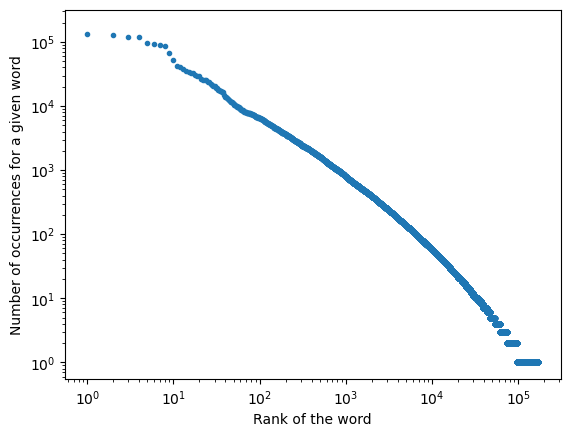

In [23]:
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Number of occurrences for a given word')
plt.xlabel('Rank of the word')
plt.plot(sorted_frequency_list.values(),'.')

In [26]:
list(sorted_frequency_list)[:10]

['w', 'nie', 'i', 'na', 'to', 'z', 'jest', 'że', 'się', 'do']

Most common words in corpus are prepositions, but such words may not provide much information. In order to properly analyse text we should delete them, leaving much more space for semantic words.

#### the performance of your method compared to ElasticSearch, the results provided by your method compared to ElasticSearch,

The fuzzy match significantly outperformed all others, with the nDCG score experiencing a boost of more than 7% compared to the Levenshtein method. The time required for calculation was nearly equivalent to that of the other methods.

#### the validity of the obtained corrections.

In [90]:
not_in_dict.tail(20)

,token,count,corrected_token
20458,ozywateli,1,obywateli
20463,"Breakfast,",1,"breakfast,"
20464,ćame,1,same
20465,Day,1,pay
20466,Capital,1,capital
20467,Gains,1,gains
20468,rozliczmniowy,1,rozliczeniowy
20469,xest,1,jest
20473,ASO,1,śSO
20476,samochodp,1,samochodu


In [91]:
not_in_dict.head(5)

,token,count,corrected_token
78,ETF,73,hETF
167,LLC,33,LL
270,Finance,24,finance
275,LLC?,23,LL?
287,Yahoo,23,yahoo


This method manages very well to fix the errors in the text, however it struggles with proper nouns. For example, it 'corrected' Skąe to ySkąe. Examples above clearly visualize strengths and weaknesses in this method.